In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. LOAD DATA

In [2]:
df = pd.read_csv("SuperMarket Analysis.csv")

### Clean column names

In [3]:
df.columns = [c.strip() for c in df.columns]

### 2. PARSE DATE & TIME

In [4]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p", errors="coerce")

df["DayOfWeek"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
df["Hour"] = df["Time"].dt.hour

### 3. FIX NUMERIC COLUMNS

In [5]:
num_cols = ["Unit price", "Quantity", "Tax 5%", "cogs", "gross income", "Rating", "Sales"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


### 4. BASIC SUMMARY

In [6]:
print("\n Shape:", df.shape)


 Shape: (1000, 20)


In [7]:
print("\n Info:",df.info)


 Info: <bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428   Alex     Yangon        Member  Female   
1    226-31-3081   Giza  Naypyitaw        Normal  Female   
2    631-41-3108   Alex     Yangon        Normal  Female   
3    123-19-1176   Alex     Yangon        Member  Female   
4    373-73-7910   Alex     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
995  233-67-5758   Giza  Naypyitaw        Normal    Male   
996  303-96-2227  Cairo   Mandalay        Normal  Female   
997  727-02-1313   Alex     Yangon        Member    Male   
998  347-56-2442   Alex     Yangon        Normal    Male   
999  849-09-3807   Alex     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Sales  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and li

In [8]:
print("\n Describe:",df.describe)


 Describe: <bound method NDFrame.describe of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428   Alex     Yangon        Member  Female   
1    226-31-3081   Giza  Naypyitaw        Normal  Female   
2    631-41-3108   Alex     Yangon        Normal  Female   
3    123-19-1176   Alex     Yangon        Member  Female   
4    373-73-7910   Alex     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
995  233-67-5758   Giza  Naypyitaw        Normal    Male   
996  303-96-2227  Cairo   Mandalay        Normal  Female   
997  727-02-1313   Alex     Yangon        Member    Male   
998  347-56-2442   Alex     Yangon        Normal    Male   
999  849-09-3807   Alex     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Sales  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home 

In [9]:
print("\n Data Types:\n", df.dtypes)


 Data Types:
 Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Sales                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
DayOfWeek                          object
Month                              object
Hour                                int32
dtype: object


In [10]:
print("\n Missing values:\n", df.isnull().sum())


 Missing values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
DayOfWeek                  0
Month                      0
Hour                       0
dtype: int64


In [11]:
data = pd.read_csv("SuperMarket Analysis.csv")

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
print("\n Duplicate rows:", df.duplicated().sum())


 Duplicate rows: 0


In [13]:
print("\n First 5 rows:\n", df.head())


 First 5 rows:
     Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

                 Time      Payment    cogs  gross margin percentage  \
0 1900-01-01 13:08:00      Ewallet  522.83                 4.761905   
1 190

### 5. GROUPED ANALYSIS

In [14]:
print("\n Sales by Branch:\n", df.groupby("Branch")["Sales"].sum())


 Sales by Branch:
 Branch
Alex     106200.3705
Cairo    106197.6720
Giza     110568.7065
Name: Sales, dtype: float64


In [15]:
print("\n Sales by Product Line:\n", df.groupby("Product line")["Sales"].sum())


 Sales by Product Line:
 Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Sales, dtype: float64


In [16]:
print("\n Payment Method Counts:\n", df["Payment"].value_counts())


 Payment Method Counts:
 Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [17]:
print("\n Average Rating by Product Line:\n", df.groupby("Product line")["Rating"].mean())


 Average Rating by Product Line:
 Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


### 6. PLOTS

##### Gender Distribution

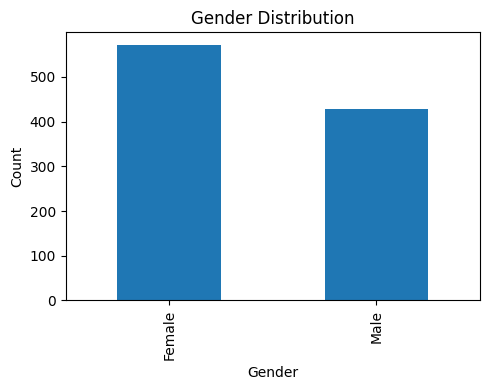

In [18]:
plt.style.use("default")

plt.figure(figsize=(5,4))
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### Sales by Branch

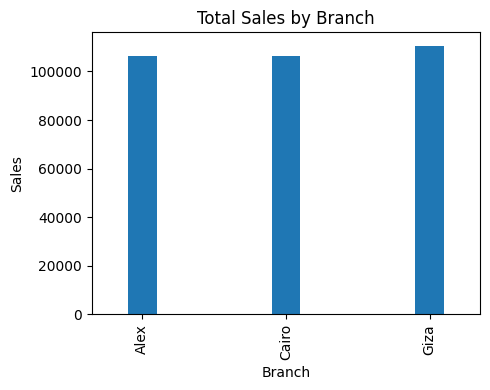

In [19]:
plt.figure(figsize=(5,4))

df.groupby("Branch")["Sales"].sum().plot(kind="bar", width=0.2)  # reduce width here

plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


##### Sales by Product Line

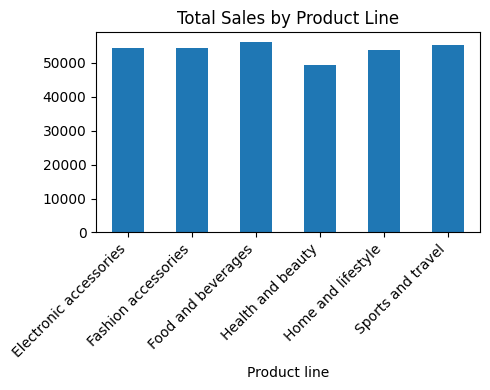

In [20]:
plt.figure(figsize=(5,4))
df.groupby("Product line")["Sales"].sum().plot(kind="bar")
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Sales Distribution

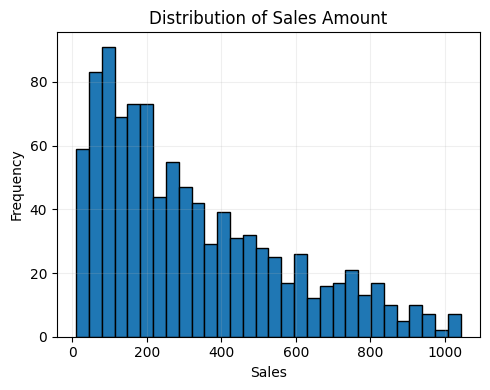

In [21]:

plt.figure(figsize=(5,4))
plt.hist(df["Sales"], bins=30 ,edgecolor='black')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

#### Boxplot by Product Line

<Figure size 500x400 with 0 Axes>

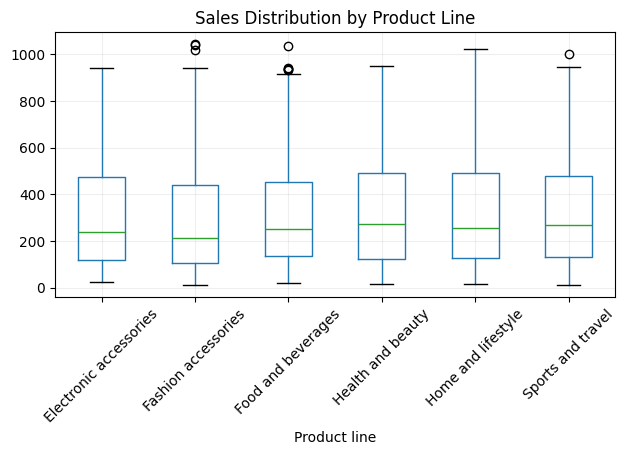

In [22]:
plt.figure(figsize=(5,4))
df.boxplot(column="Sales", by="Product line", rot=45)
plt.title("Sales Distribution by Product Line")
plt.suptitle("")
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

##### Sales by Day of Week

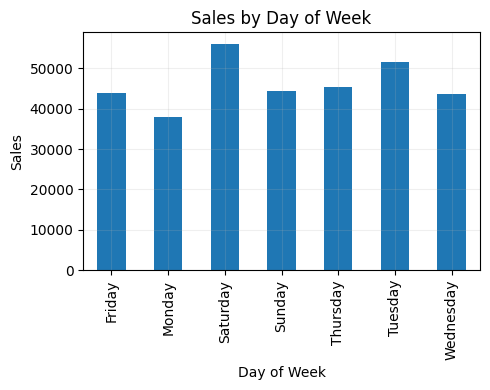

In [23]:
plt.figure(figsize=(5,4))
df.groupby("DayOfWeek")["Sales"].sum().plot(kind="bar")
plt.title("Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

#### Payment Method

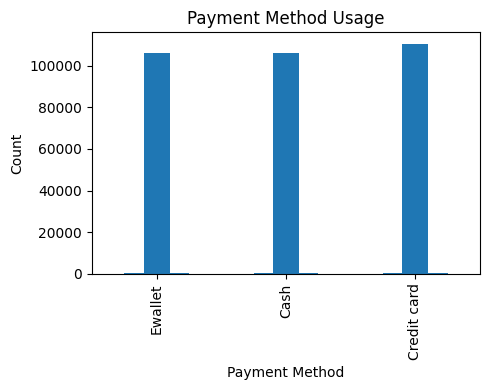

In [24]:
plt.figure(figsize=(5,4))

df.groupby("Branch")["Sales"].sum().plot(kind="bar", width=0.2)
df["Payment"].value_counts().plot(kind="bar")
plt.title("Payment Method Usage")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Distribution of Unit Price

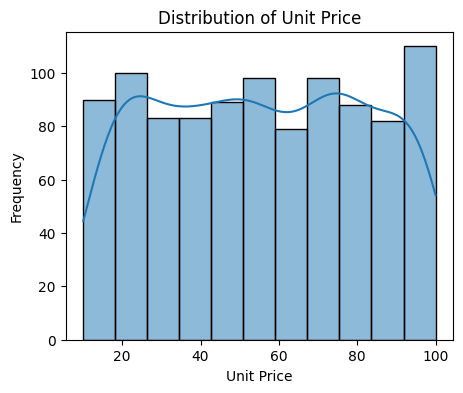

In [25]:
plt.figure(figsize=(5,4))
sns.histplot(data['Unit price'], kde=True)
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


##### Distribution of Tax 5%

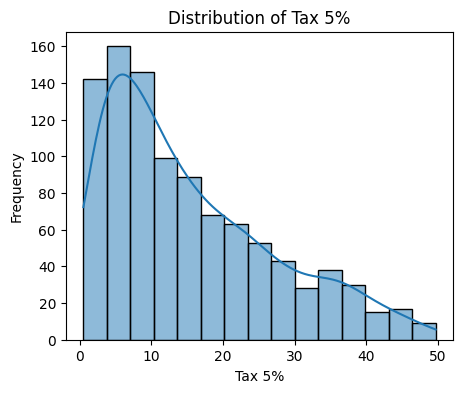

In [26]:
plt.figure(figsize=(5,4))
sns.histplot(data['Tax 5%'], kde=True)
plt.title("Distribution of Tax 5%")
plt.xlabel("Tax 5%")
plt.ylabel("Frequency")
plt.show()


##### Hourly Sales Trend

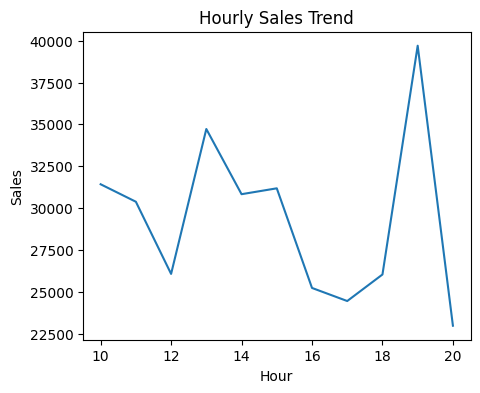

In [27]:
hourly_sales = df.groupby('Hour')['Sales'].sum()

plt.figure(figsize=(5,4))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Hourly Sales Trend")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()


##### Correlation Heatmap

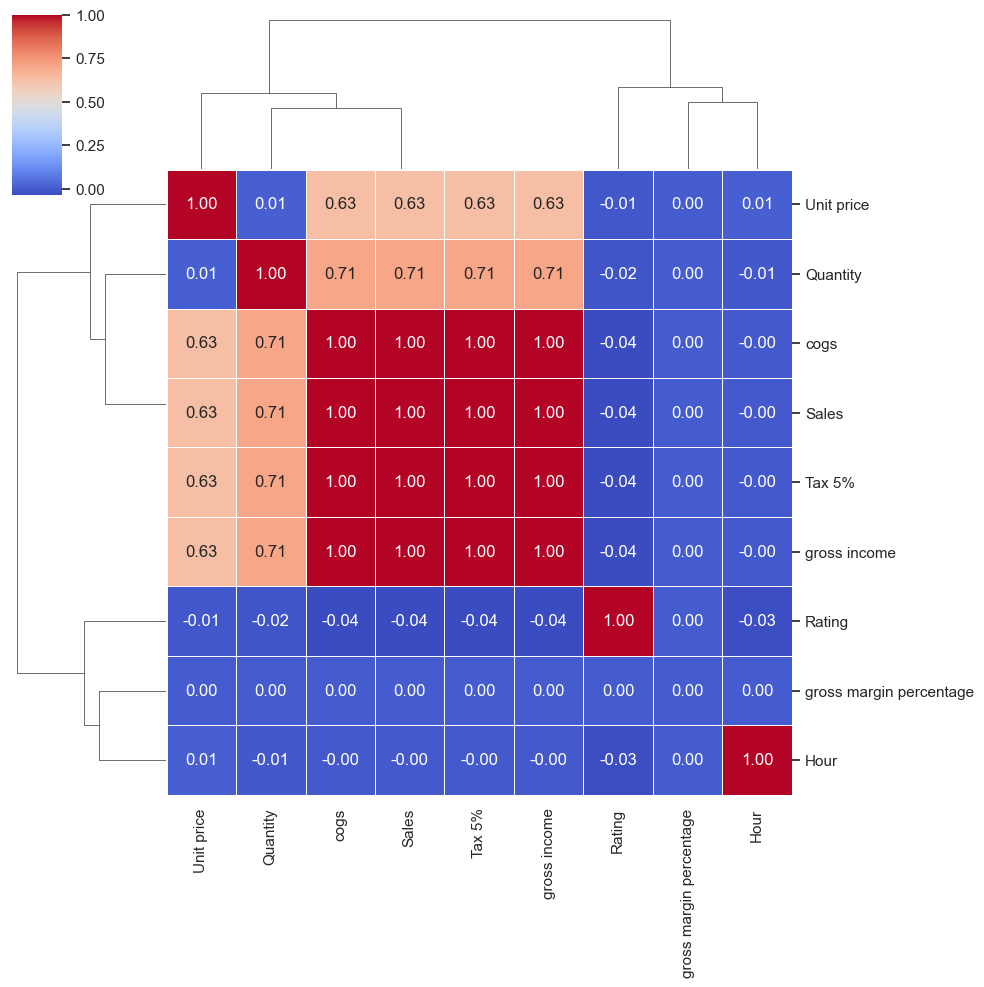

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

corr = corr.fillna(0).replace([float("inf"), float("-inf")], 0)

sns.set(rc={"figure.figsize": (12,10)})

sns.clustermap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.show()


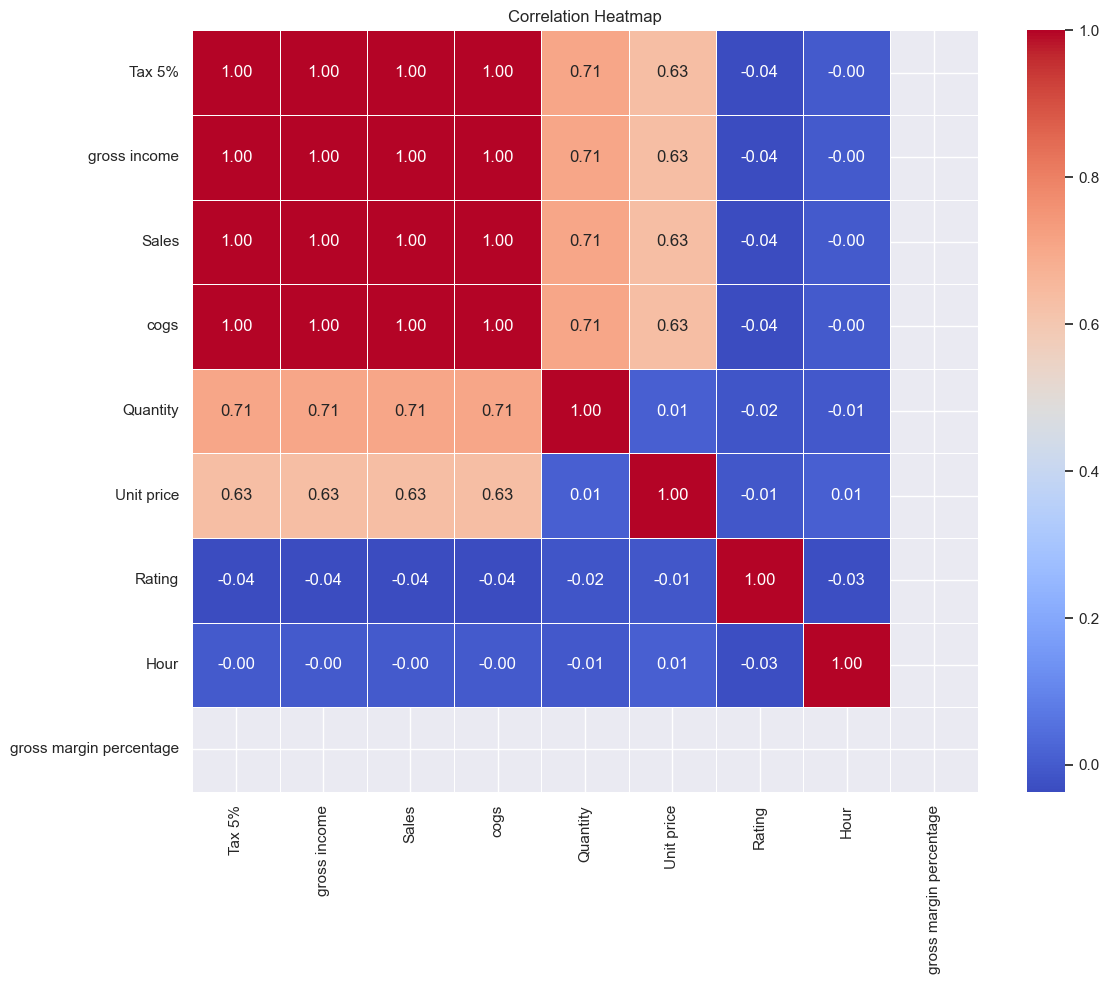

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr(numeric_only=True)


ordered_cols = corr.abs().sum().sort_values(ascending=False).index
corr = corr.loc[ordered_cols, ordered_cols]

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


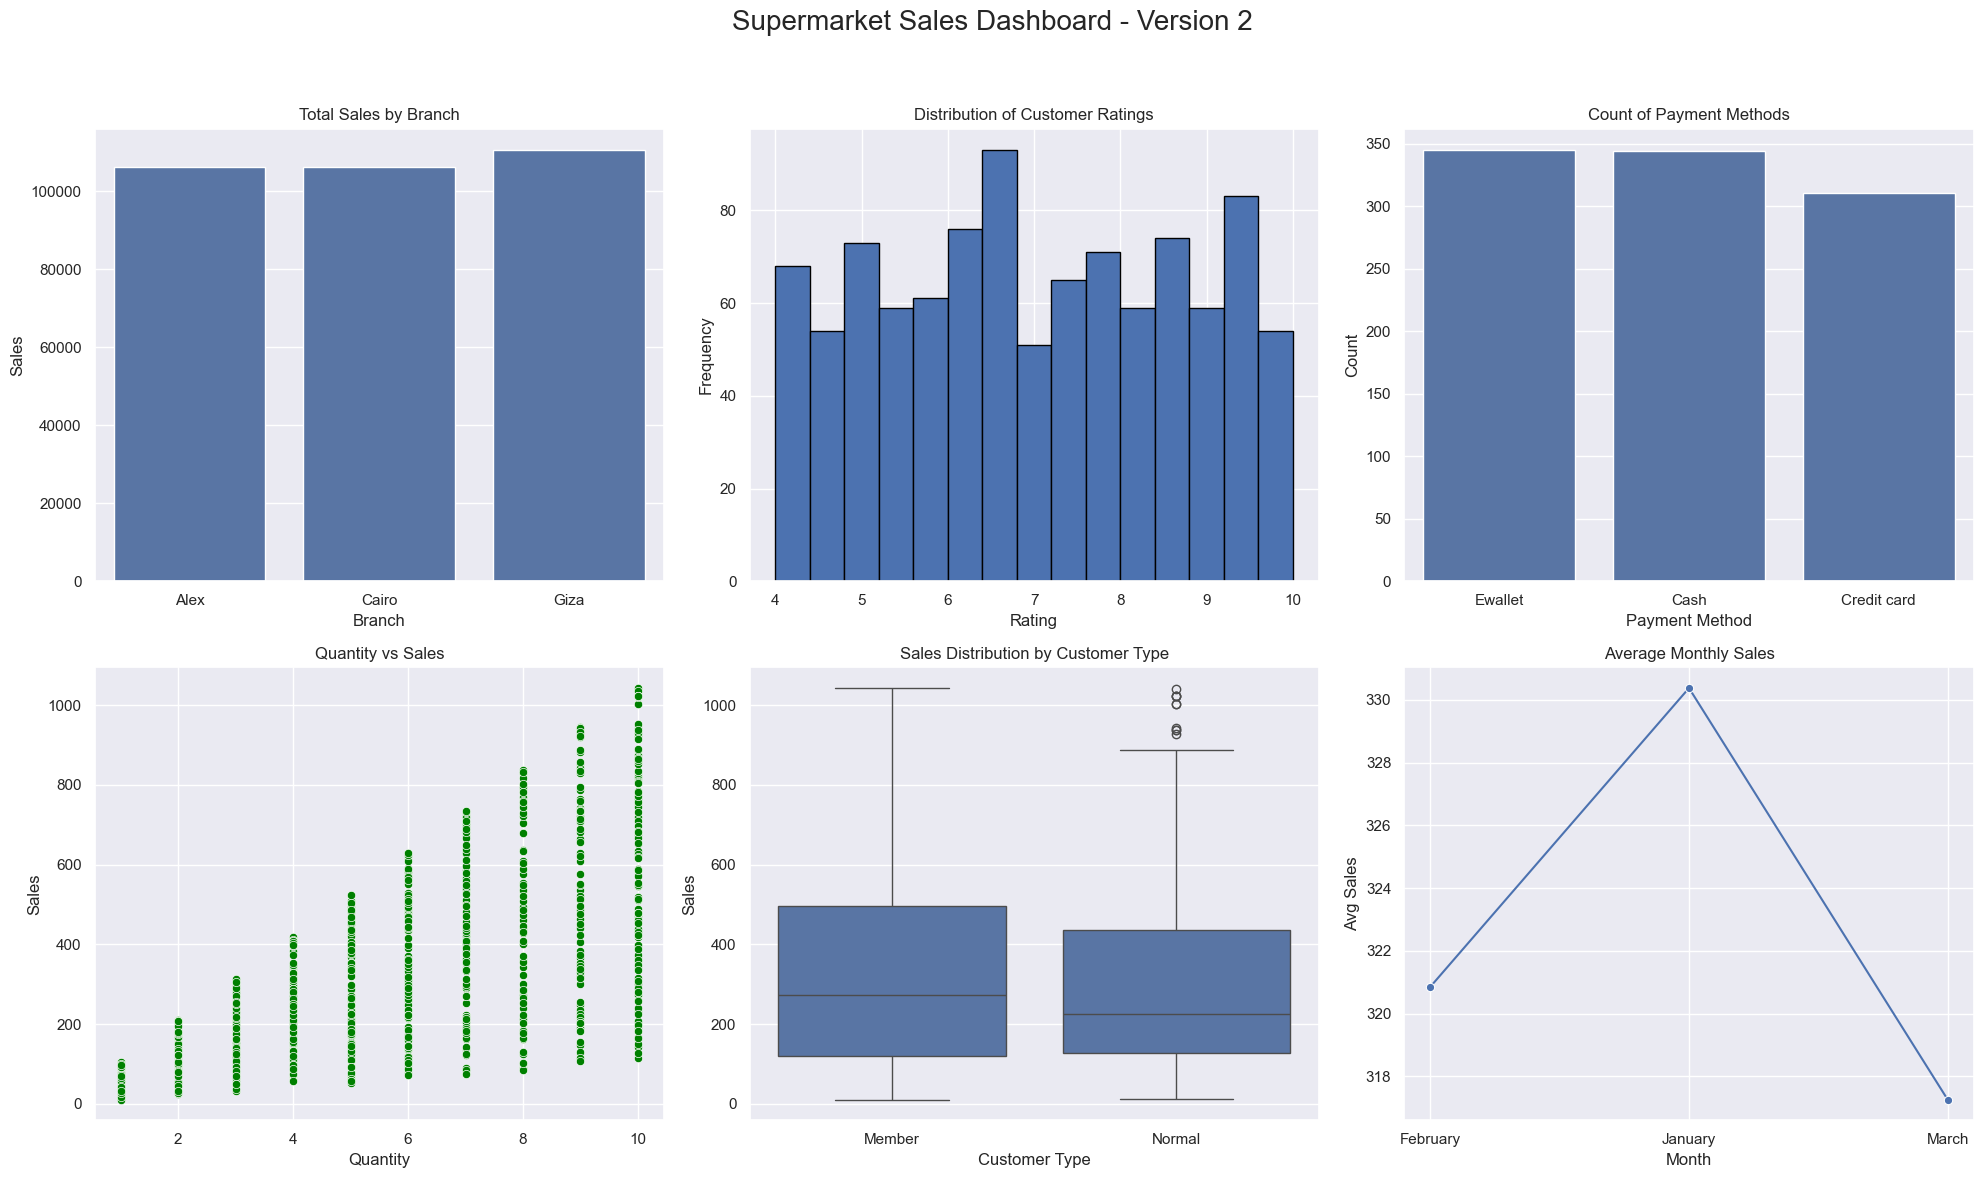

In [30]:
plt.figure(figsize=(20,12))
plt.suptitle("Supermarket Sales Dashboard - Version 2", fontsize=20)

# 1 — Barplot: Total Sales by Branch
plt.subplot(2,3,1)
branch_sales = df.groupby("Branch")["Sales"].sum().reset_index()
sns.barplot(x="Branch", y="Sales", data=branch_sales)
plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Sales")

# 2 — Histogram: Distribution of Rating
plt.subplot(2,3,2)
plt.hist(df["Rating"], bins=15, edgecolor="black")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# 3 — Countplot: Payment Methods
plt.subplot(2,3,3)
sns.countplot(x="Payment", data=df)
plt.title("Count of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")

# 4 — Scatter: Quantity vs Sales
plt.subplot(2,3,4)
sns.scatterplot(x="Quantity", y="Sales", data=df, color="green")
plt.title("Quantity vs Sales")
plt.xlabel("Quantity")
plt.ylabel("Sales")

# 5 — Boxplot: Sales by Customer Type
plt.subplot(2,3,5)
sns.boxplot(x="Customer type", y="Sales", data=df)
plt.title("Sales Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Sales")

# 6 — Lineplot: Average Sales by Month
plt.subplot(2,3,6)
monthly_sales = df.groupby("Month")["Sales"].mean().reset_index()
sns.lineplot(x="Month", y="Sales", data=monthly_sales, marker="o")
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Avg Sales")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
